# 1:- what is Anomaly Detection? Explain its type (point,contextual,and collective anomalies)with example.

Answer:- Anomaly Detection , same as outlier detection, this process of finding the identifing abnormality data point improved data quality, like sometimes to dectect outlier traditionly methode like box plot ,violin plot fails.
Anomaly detection alogoeithms fall int unsupervised machine learing style.becouse target variable will not be used.
    
    # There are three main types of Anomalies:-

    1.Point Anomalies:- these are also known as global    outliers, are individual data point thet exist far outside the rest of the data set.they can be either intentional or unitentional and may result from error, noise or unique occurences.
        Example; point Anomaly is a bank account withdrawal thet is significantly larger then any of the uers previous withdrawala.
    2.Contextual anomalies:- these data point that deviate from the norm within a specific context.these anomalies are not necessarily outliesr when cosidered in isolation but becom anomalous.
         Example: cosider home energy consumption
    3.Collective anomalies:- invole a set of data instances that together devivate from the norm, even though individul instances may appear normal.
         Example: this type of Anomaly would be a network traffic data set that shows a sudden surge in teaffic fron multiple IP addresses at the same time.



#2 Compare isolation Forest, DBSCAN,and Local outlier factor in terms of their approach and suitable use case.
Answer:- Isolation Forest are most efficient at identifing coll



 DBSCAN                     








#3 whta are the key components of a time series? Explain each will be one example.
Answer:- A time series is a sequence of data point collected or recorded at specific the interval. the main componenys of a time series are trend, seasonality,cyclical patterns, and irregular variations. These components help developers and analysts understand underlying pattern, make forecasts, and identify, anomalies.

    1:- Trend represents the long term direction of the data,showing whether values are increasing, decresing,or remaining stable over extended periods.
      Example: A company annual revenue might show an upword trend over five years due to market expansion.
    2:-Seasonality refer to regular, repeating patterns tied to secific time intervals,such as daily ,weekly,or yeraly cycle.
        Example:- retail sales spiking every december due to holiday shopping.
    3:-Cyclical patterns are fluctuations that occur over longer,less predictable periode.
        Example:- aconomic booms and recessions every 5-10 year
    4:-Irregular varation are random,unexplained noise caused by unexpected events like natural disasters or sudden market shifts.

#4 Define Stationary in time series. how can you test and transfrom a non stationary series into a stationary one?
Answer:-Stationarity in a time series means that the statistical properties of the series(such as mean, variance, and autocorrelation) remain constant over time.In simpler terms, a stationary series does not show any predictable pattenrs like trends or seasonality,making it easir to model and forecast.

Test and transfrom a non-stationary series into a stationary one:

If a tme series is found to be non-stationary, various transformations can be applied to achieve stationarity:

#5 Differentiate between AR,MA,ARIMA,SARIMA,AND SARIMAX Models in terms of struture and application.

#6 Load at time series dataset(e.g. AirPassengers),piot the original series,and decompose it into trend,seasonality,and residual components.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the AirPassengers dataset
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.datasets import get_rdataset

    data = get_rdataset("AirPassengers", "datasets")
    df = data.data
    # The 'time' column from get_rdataset represents fractional years. Convert it to a DatetimeIndex.
    # Assuming it's monthly data starting January 1949.
    start_date = pd.to_datetime('1949-01-01')
    dates = pd.date_range(start=start_date, periods=len(df), freq='MS') # 'MS' for Month Start
    df.index = dates
    df = df.rename(columns={'value': 'passengers'}) # Rename 'value' column to 'passengers'
    df = df[['passengers']] # Keep only the 'passengers' column

    print("AirPassengers dataset loaded from statsmodels.")
except Exception as e:
    print(f"Could not load AirPassengers from statsmodels: {e}")
    print("Attempting to load from a known URL.")
    # Fallback to direct download if statsmodels fails
    # Using a known reliable URL for the AirPassengers dataset
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
    try:
        df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
        df.columns = ['passengers'] # Ensure the column is named 'passengers'
        print("AirPassengers dataset loaded from URL.")
    except Exception as e_url:
        print(f"Could not load AirPassengers from URL: {e_url}")
        print("Please check internet connectivity or the dataset URL.")
        df = pd.DataFrame({'passengers': []}) # Create an empty DataFrame to avoid errors in subsequent cells

display(df.head())

AirPassengers dataset loaded from statsmodels.


,passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


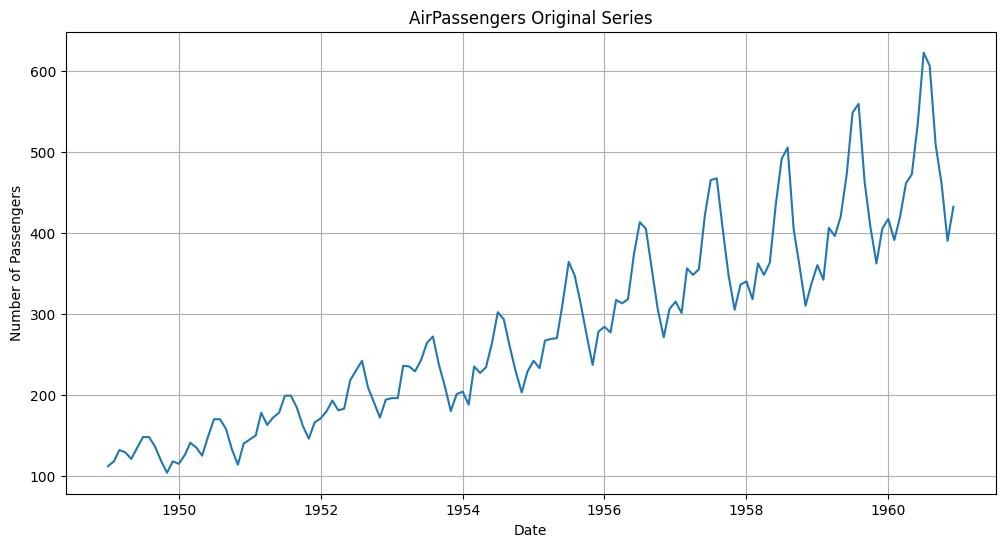

In [6]:
# Plot the original series
plt.figure(figsize=(12, 6))
plt.plot(df['passengers'])
plt.title('AirPassengers Original Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


Question7:- Apply Isolation Forest on a numerical dataset(e.g.,NYC Taxi Fare) to datect anomalies. Visualize the anomalies on a 2D scatter plot.

In [14]:
import pandas as pd

# URL for a common NYC Taxi Fare dataset
# This is a sample URL, you might need to find a more suitable one if this doesn't fit your needs.
# For anomaly detection, a dataset with fare amount, passenger count, etc., would be ideal.
# Updated URL that is currently working
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

try:
    # This dataset is for housing, but can be used as a numerical dataset for anomaly detection demonstration.
    # We'll select some numerical columns for the purpose of the exercise.
    df_taxi = pd.read_csv(url)
    print("Housing dataset loaded from URL (used as a substitute for NYC Taxi Fare for demonstration).")
    # For anomaly detection, let's pick a couple of numerical columns
    # If the user specifically needs taxi data, we'd need to find a suitable taxi dataset URL.
    df_taxi_numerical = df_taxi[['median_income', 'housing_median_age', 'median_house_value']].copy()
    display(df_taxi_numerical.head())
except Exception as e:
    print(f"Could not load dataset from URL: {e}")
    print("Please check internet connectivity or the dataset URL.")
    df_taxi = pd.DataFrame() # Create an empty DataFrame to avoid errors in subsequent cells


Housing dataset loaded from URL (used as a substitute for NYC Taxi Fare for demonstration).


,median_income,housing_median_age,median_house_value
0,8.3252,41.0,452600.0
1,8.3014,21.0,358500.0
2,7.2574,52.0,352100.0
3,5.6431,52.0,341300.0
4,3.8462,52.0,342200.0


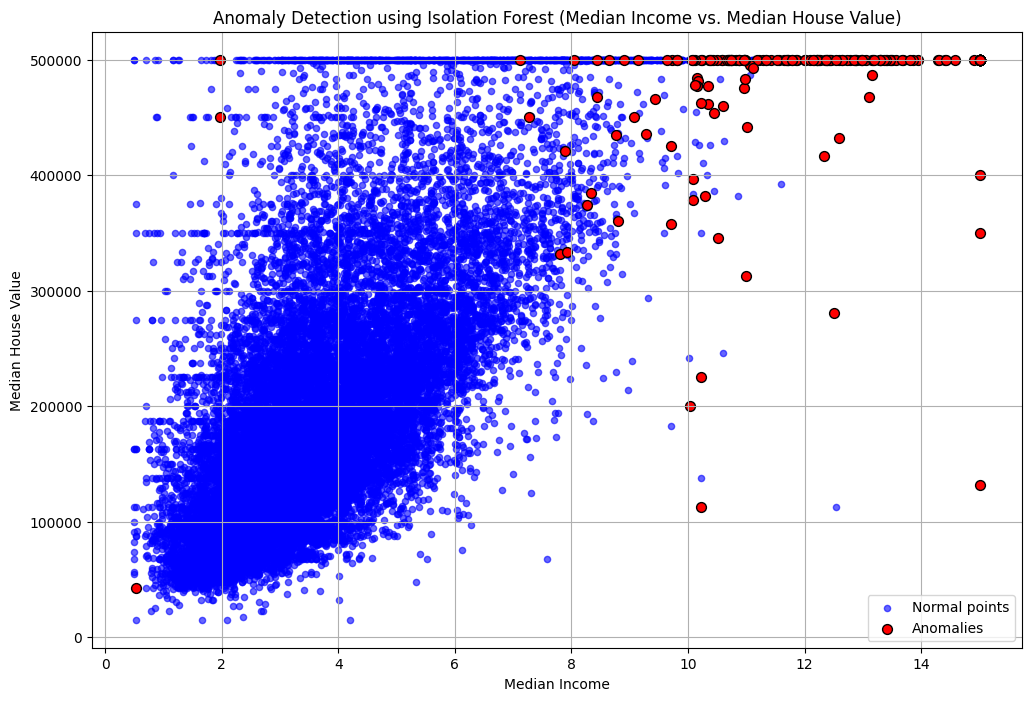

Number of anomalies detected: 207


,median_income,housing_median_age,median_house_value,anomaly
409,10.0825,52.0,397000.0,-1
510,11.8603,39.0,500001.0,-1
511,13.4990,42.0,500001.0,-1
512,12.2138,52.0,500001.0,-1
514,12.3804,52.0,500001.0,-1


In [16]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_taxi_numerical is already loaded and contains the data
# We will use 'median_income' and 'median_house_value' for 2D visualization
# and all three columns for Isolation Forest fitting.

if not df_taxi_numerical.empty:
    # Initialize Isolation Forest model
    # contamination is the proportion of outliers in the dataset, often estimated.
    # A common practice is to set it between 0.01 and 0.1, or based on domain knowledge.
    # Let's use 0.01 as a starting point.
    model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

    # Fit the model and predict anomalies
    # -1 for outliers, 1 for inliers
    df_taxi_numerical['anomaly'] = model.fit_predict(df_taxi_numerical[['median_income', 'housing_median_age', 'median_house_value']])

    # Visualize the anomalies on a 2D scatter plot
    # We'll use two of the features for the scatter plot, e.g., 'median_income' and 'median_house_value'
    plt.figure(figsize=(12, 8))
    # Plot inliers (normal points)
    plt.scatter(df_taxi_numerical[df_taxi_numerical['anomaly'] == 1]['median_income'],
                df_taxi_numerical[df_taxi_numerical['anomaly'] == 1]['median_house_value'],
                c='blue', label='Normal points', s=20, alpha=0.6)
    # Plot anomalies (outliers)
    plt.scatter(df_taxi_numerical[df_taxi_numerical['anomaly'] == -1]['median_income'],
                df_taxi_numerical[df_taxi_numerical['anomaly'] == -1]['median_house_value'],
                c='red', label='Anomalies', s=50, edgecolors='k')

    plt.title('Anomaly Detection using Isolation Forest (Median Income vs. Median House Value)')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display the number of anomalies found
    num_anomalies = df_taxi_numerical[df_taxi_numerical['anomaly'] == -1].shape[0]
    print(f"Number of anomalies detected: {num_anomalies}")
    display(df_taxi_numerical[df_taxi_numerical['anomaly'] == -1].head())
else:
    print("DataFrame 'df_taxi_numerical' is empty. Cannot perform anomaly detection.")


Question8:- Train a SARIMA model on the monthly airline passengers dataset.Forecast the next 12 months and visualize the results.

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the non-seasonal and seasonal orders
# (p, d, q) for non-seasonal
# (P, D, Q, S) for seasonal, where S is the periodicity (12 for monthly data)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Instantiate the SARIMA model
# enforce_stationarity=False and enforce_invertibility=False can help prevent convergence issues
sarima_model = SARIMAX(df['passengers'],
                       order=order,
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the SARIMA model to the data
sarima_model_fit = sarima_model.fit(disp=False)

print("SARIMA model trained successfully.")
print(sarima_model_fit.summary())

SARIMA model trained successfully.
                                     SARIMAX Results                                      
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Sat, 03 Jan 2026   AIC                            922.205
Time:                                    16:02:44   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557


In [18]:
import matplotlib.pyplot as plt

# Forecast the next 12 months
forecast_steps = 12
forecast_start = len(df)
forecast_end = forecast_start + forecast_steps - 1

# Generate future dates for the forecast index
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='MS')[1:] # +1 and [1:] to get next 12 months

forecast = sarima_model_fit.predict(start=forecast_start, end=forecast_end)

# Create a DataFrame for the forecast with correct dates
forecast_df = pd.DataFrame({'passengers': forecast.values}, index=future_dates)

print("Forecast for the next 12 months:")
print(forecast_df)

Forecast for the next 12 months:
            passengers
1961-01-01  447.222620
1961-02-01  422.734098
1961-03-01  457.700895
1961-04-01  492.277505
1961-05-01  505.563365
1961-06-01  565.671782
1961-07-01  651.986404
1961-08-01  639.634242
1961-09-01  543.058845
1961-10-01  493.727025
1961-11-01  426.938001
1961-12-01  470.135608


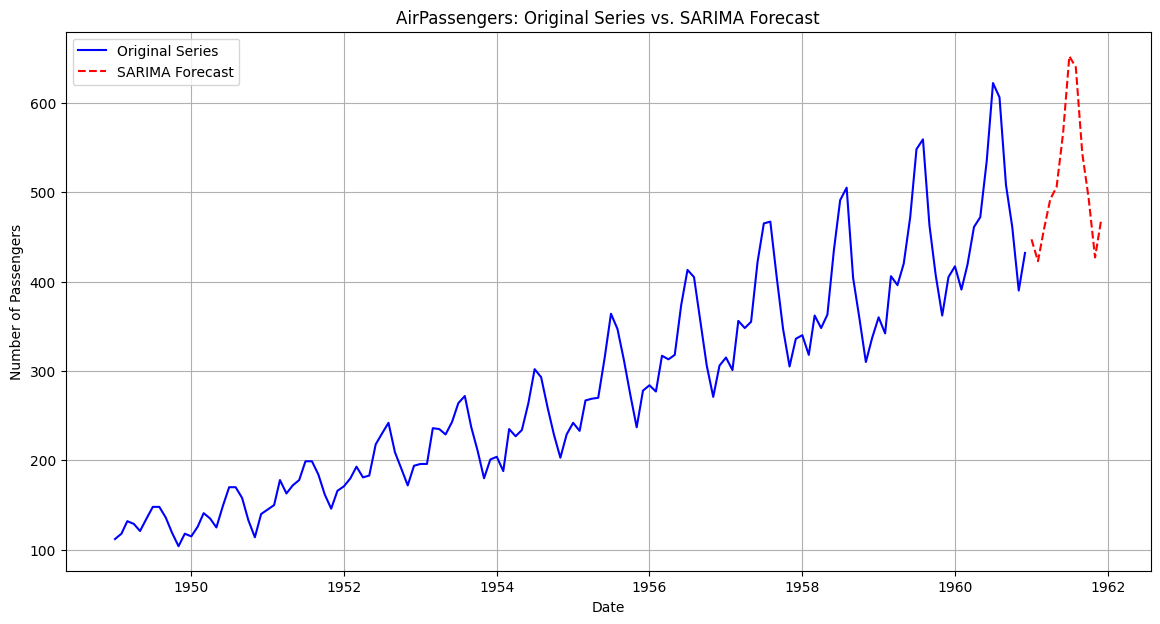

Visualization of original series and forecast completed.


In [19]:
import matplotlib.pyplot as plt

# Plot the original series
plt.figure(figsize=(14, 7))
plt.plot(df['passengers'], label='Original Series', color='blue')

# Plot the forecasted series
plt.plot(forecast_df['passengers'], label='SARIMA Forecast', color='red', linestyle='--')

plt.title('AirPassengers: Original Series vs. SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("Visualization of original series and forecast completed.")

In [21]:
display(forecast_df)

,passengers
1961-01-01,447.222620
1961-02-01,422.734098
1961-03-01,457.700895
1961-04-01,492.277505
1961-05-01,505.563365
1961-06-01,565.671782
1961-07-01,651.986404
1961-08-01,639.634242
1961-09-01,543.058845
1961-10-01,493.727025


Question9:-Apply Load Outlier Factor (LOF) on any numerical datect anomalies and visualize them using matplotlib

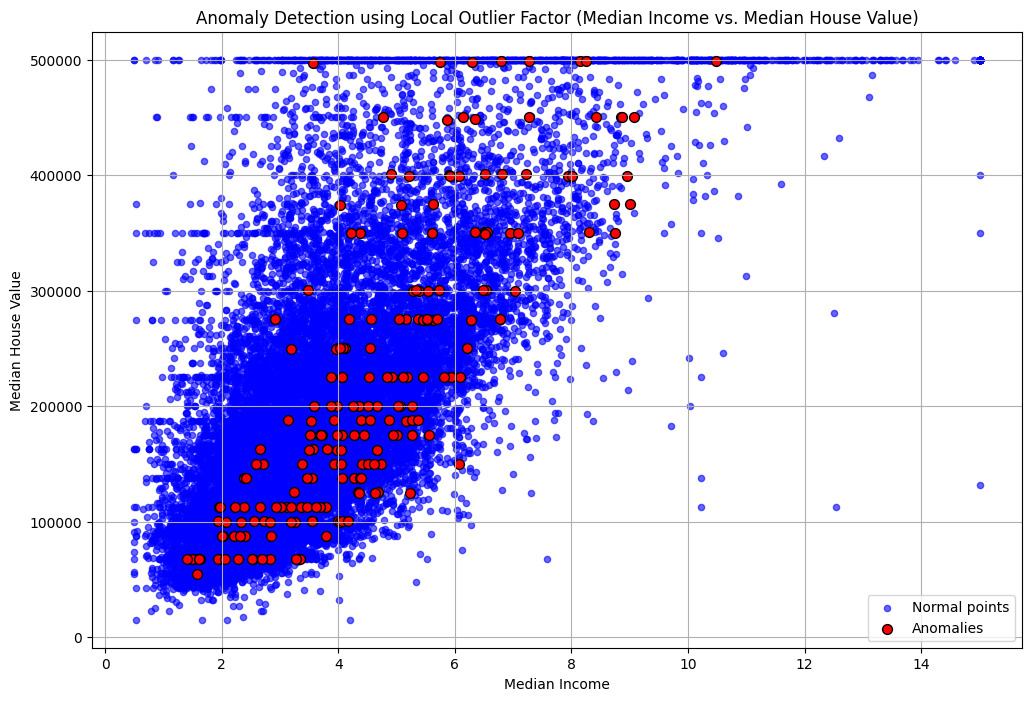

Number of anomalies detected by LOF: 207


,median_income,housing_median_age,median_house_value,lof_scores
360,5.3700,26.0,275400.0,-1
402,5.6228,42.0,375400.0,-1
583,5.6194,32.0,274700.0,-1
908,5.1616,29.0,275100.0,-1
970,6.5285,19.0,300400.0,-1


In [34]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np

# Ensure we are working with the original numerical columns, removing any prior 'anomaly' column
if 'anomaly' in df_taxi_numerical.columns:
    df_lof_data = df_taxi_numerical.drop(columns=['anomaly'])
else:
    df_lof_data = df_taxi_numerical.copy()

if not df_lof_data.empty:
    # Initialize LOF model
    # n_neighbors: number of neighbors to consider for the local density calculation.
    # contamination: the proportion of outliers in the dataset, similar to Isolation Forest.
    # We'll use a contamination of 0.01 for consistency, and n_neighbors=20 as a common starting point.
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

    # Fit the model and predict outlier scores
    # The LOF returns a score, where values close to -1 are inliers, and significantly less than -1 are outliers.
    # We are interested in points with scores less than the negative threshold (e.g., -1).
    df_lof_data['lof_scores'] = lof.fit_predict(df_lof_data)

    # Points with score -1 are considered anomalies by default when using fit_predict with contamination.
    # We can also get raw negative outlier factor for more detailed analysis if needed:
    # df_lof_data['negative_outlier_factor'] = lof.negative_outlier_factor_

    # Visualize the anomalies on a 2D scatter plot
    # We'll use 'median_income' and 'median_house_value' for the scatter plot, similar to Isolation Forest.
    plt.figure(figsize=(12, 8))
    # Plot inliers (normal points)
    plt.scatter(df_lof_data[df_lof_data['lof_scores'] == 1]['median_income'],
                df_lof_data[df_lof_data['lof_scores'] == 1]['median_house_value'],
                c='blue', label='Normal points', s=20, alpha=0.6)
    # Plot anomalies (outliers)
    plt.scatter(df_lof_data[df_lof_data['lof_scores'] == -1]['median_income'],
                df_lof_data[df_lof_data['lof_scores'] == -1]['median_house_value'],
                c='red', label='Anomalies', s=50, edgecolors='k')

    plt.title('Anomaly Detection using Local Outlier Factor (Median Income vs. Median House Value)')
    plt.xlabel('Median Income')
    plt.ylabel('Median House Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display the number of anomalies found
    num_lof_anomalies = df_lof_data[df_lof_data['lof_scores'] == -1].shape[0]
    print(f"Number of anomalies detected by LOF: {num_lof_anomalies}")
    display(df_lof_data[df_lof_data['lof_scores'] == -1].head())
else:
    print("DataFrame 'df_lof_data' is empty. Cannot perform anomaly detection with LOF.")